In [1]:
'/Users/user/Dropbox/OFFICE/my_science/Calculations/matgen'
from importlib import reload
import time
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns

In [3]:
reload(matutils)

<module 'matgen.matutils' from '/Users/user/Dropbox/OFFICE/my_science/Calculations/matgen/matutils.py'>

In [2]:
from matgen import base, matutils
from matgen.base import CellComplex

In [3]:
## Settings

In [4]:
# bins = np.linspace(0, 64, 33) # 32 bins
bins = [0, 15, 63] # 2 bins

In [5]:
max_order = 8

In [6]:
figsize = [8, 6]
import matplotlib as mpl
mpl.rcParams["figure.figsize"] = figsize

In [7]:
## Random

In [8]:
filename = '/Users/user/Dropbox/OFFICE/my_science/Calculations/random/disangles3.txt'
random_distr = np.loadtxt(filename)

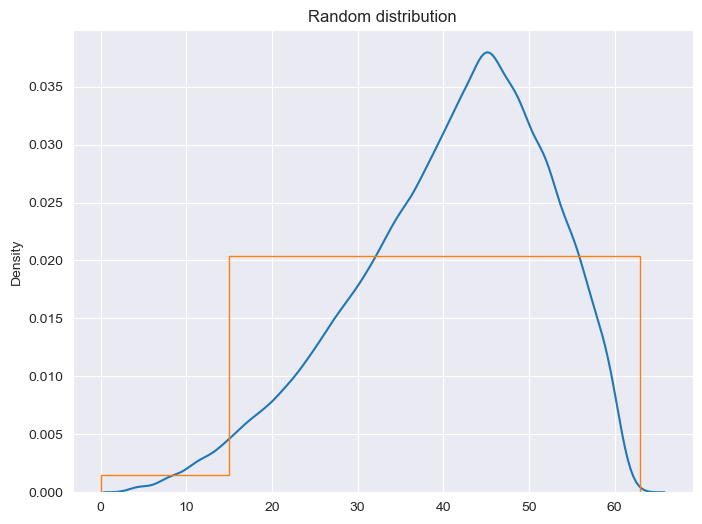

In [9]:
ax = sns.kdeplot(random_distr)
ax.hist(random_distr, bins=bins, histtype='step', density=True)
ax.set_title('Random distribution')
plt.show()

In [10]:
Q_random, _ = np.histogram(random_distr, bins=bins)
Q_random = Q_random / Q_random.sum()

In [11]:
## htp1.2

In [12]:
filename = '/Users/user/Dropbox/OFFICE/my_science/PCCs/pass4.tess'
cell_complex = CellComplex.from_tess_file(filename, with_theta=True)
print(cell_complex)
cell_complex.set_theta_from_ori()
cell_complex.dim
cell_complex.load_time

20:24:47 Error reading theta from file /Users/user/Dropbox/OFFICE/my_science/PCCs/pass4.stedge


<class CellComplex> 2D
20568 vertices
30850 edges
10283 faces


0.3

In [61]:
disangles = {}

for i in range(1, max_order + 1):
    #filename = os.path.join(dirname, f'disangles{i}.txt')
    #disangles[i] = np.loadtxt(filename)
    print(i)
    cell_complex.find_neighbors_of_order(i)
    disangles[i] = cell_complex.get_neighbor_dis_angles(i)

1


100%|██████████| 10283/10283 [00:40<00:00, 250.95it/s]


2


100%|██████████| 10283/10283 [01:28<00:00, 116.26it/s]


3


100%|██████████| 10283/10283 [02:38<00:00, 64.77it/s] 


4


100%|██████████| 10283/10283 [27:27<00:00,  6.24it/s]  


5


100%|██████████| 10283/10283 [04:59<00:00, 34.36it/s] 


6


100%|██████████| 10283/10283 [06:42<00:00, 25.55it/s] 


7


100%|██████████| 10283/10283 [39:31<00:00,  4.34it/s]   


8


100%|██████████| 10283/10283 [09:41<00:00, 17.68it/s] 


In [62]:
#title = 'HPT2022/hpt1.2'
#dirname = '/Users/user/Dropbox/OFFICE/my_science/Calculations/hpt1/'

for i in range(1, max_order + 1):
    filename = os.path.join(dirname, f'disangles{i}.txt')
    disangles[i] = np.loadtxt(filename)

NameError: name 'dirname' is not defined

In [13]:
for i in range(1, max_order + 1):
    plt.hist(disangles[i], bins=bins, density=True, histtype='step', label=str(i))
plt.hist(random_distr, bins=bins, density=True, histtype='step', label='baseline')
plt.legend()
plt.show()

NameError: name 'disangles' is not defined

In [64]:
print('Is difference from random significant?')
for i in range(1, max_order + 1):
    ns, _ = np.histogram(disangles[i], bins=bins)
    ms, _ = np.histogram(random_distr, bins=bins)
    _, pvalue = matutils._check_chi2(ns, ms)
    print(i, len(disangles[i]), pvalue, pvalue < 0.001)

Is difference from random significant?
1 30537 0.0 True
2 69582 0.0 True
3 119255 0.0 True
4 177434 0.0 True
5 242649 0.0 True
6 313747 0.0 True
7 388590 1.0 False
8 465535 1.0 False


In [65]:
distance = []
x = []

Q = Q_random

for i in range(1, max_order + 1):
    P, _ = np.histogram(disangles[i], bins=bins)
    P = P / P.sum()
    d = matutils._hellinger(P, Q)
    x.append(i)
    distance.append(d)
    print(i, round(d, 3))

distance1 = distance

1 0.378
2 0.288
3 0.221
4 0.179
5 0.146
6 0.123
7 0.108
8 0.095


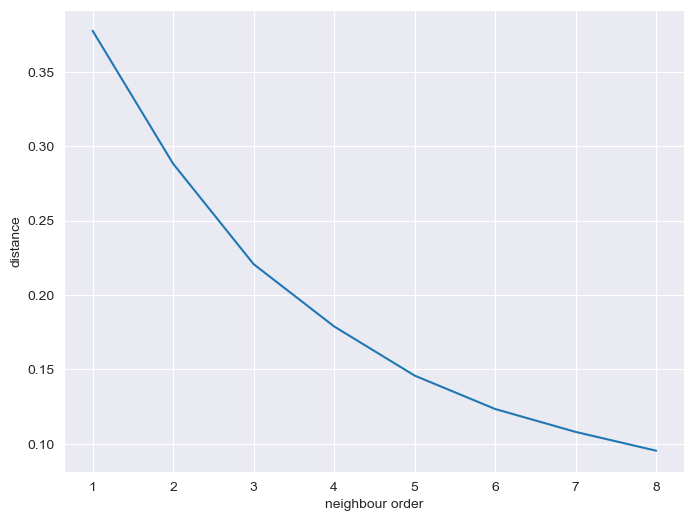

In [67]:
plt.plot(x, distance)
# plt.title(title + ', Hellinger distance from random')
plt.xlabel('neighbour order')
plt.ylabel('distance')
plt.xticks(x)
# plt.legend()
plt.show()

In [185]:
## hpt3

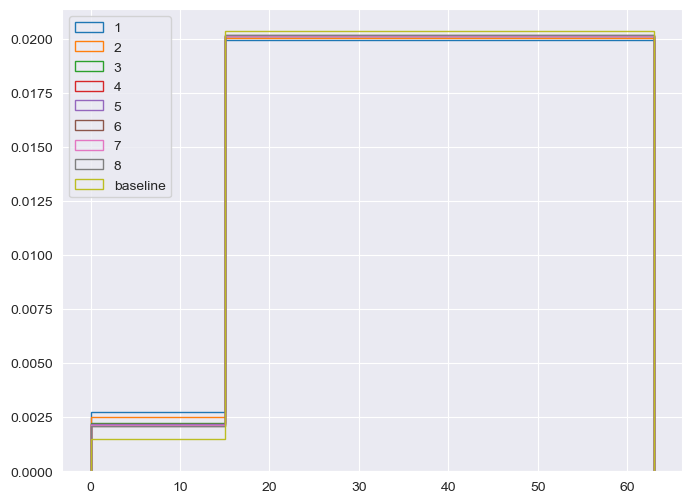

In [186]:
title = 'HPT2022/hpt3'
dirname = '/Users/user/Dropbox/OFFICE/my_science/Calculations/hpt3/'

disangles = {}
for i in range(1, max_order + 1):
    filename = os.path.join(dirname, f'disangles{i}.txt')
    disangles[i] = np.loadtxt(filename)

for i in range(1, max_order + 1):
    plt.hist(disangles[i], bins=bins, density=True, histtype='step', label=str(i))
plt.hist(random_distr, bins=bins, density=True, histtype='step', label='baseline')
plt.legend()
plt.show()

In [187]:
print('Is difference from random significant?')
for i in range(1, max_order + 1):
    ns, _ = np.histogram(disangles[i], bins=bins)
    ms, _ = np.histogram(random_distr, bins=bins)
    _, pvalue = matutils._check_chi2(ns, ms)
    print(i, len(disangles[i]), pvalue, pvalue < 0.001)

Is difference from random significant?
1 102851 0.0 True
2 225697 0.0 True
3 364050 0.0 True
4 510261 0.0 True
5 659600 0.0 True
6 810239 0.0 True
7 961060 0.0 True
8 1111434 0.0 True


In [188]:
distance = []
x = []

Q = Q_random

for i in range(1, max_order + 1):
    P, _ = np.histogram(disangles[i], bins=bins)
    P = P / P.sum()
    d = matutils._hellinger(P, Q)
    x.append(i)
    distance.append(d)
    print(i, round(d, 3))

distance3 = distance

1 0.038
2 0.032
3 0.024
4 0.022
5 0.022
6 0.02
7 0.021
8 0.02


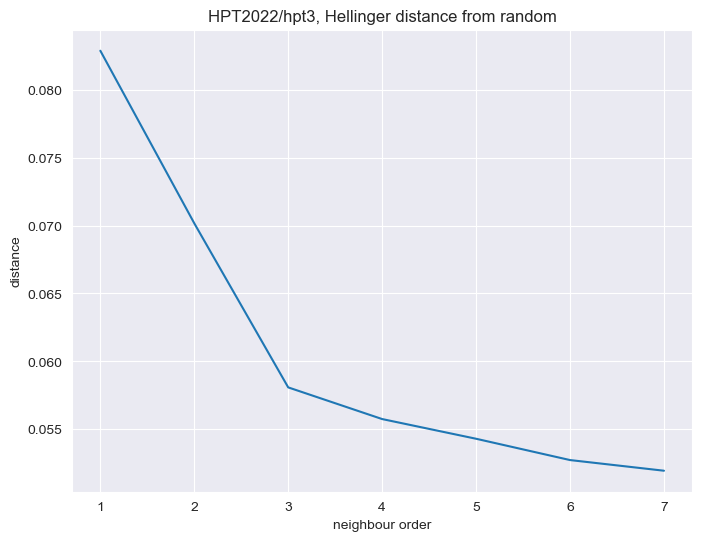

In [153]:
plt.plot(x, distance)
plt.title(title + ', Hellinger distance from random')
plt.xlabel('neighbour order')
plt.ylabel('distance')
plt.xticks(x)
# plt.legend()
plt.show()

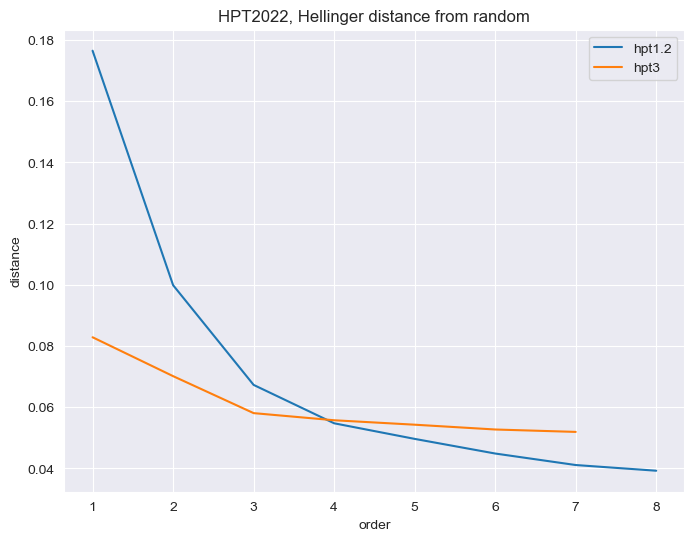

In [154]:
plt.show()
plt.plot(x + [8], distance1, label='hpt1.2')
plt.plot(x, distance3, label='hpt3')
plt.title('HPT2022' + ', Hellinger distance from random')
plt.xlabel('order')
plt.ylabel('distance')
plt.legend()
plt.show()

In [66]:
## 01Cr-01Zr Pass4

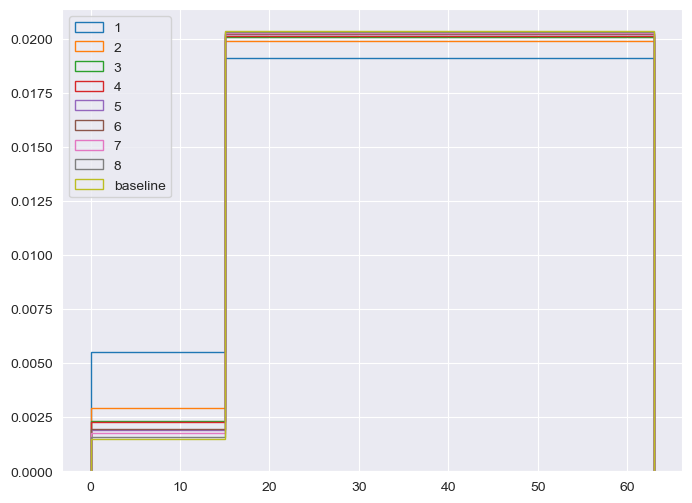

In [67]:
title = 'new ECAP2022/Cu_01Cr_01Zr/pass4'
dirname = '/Users/user/Dropbox/OFFICE/my_science/Calculations/Cu01Cr01Zr_Pass4/'

disangles = {}
for i in range(1, max_order + 1):
    filename = os.path.join(dirname, f'disangles{i}.txt')
    disangles[i] = np.loadtxt(filename)

for i in range(1, max_order + 1):
    plt.hist(disangles[i], bins=bins, density=True, histtype='step', label=str(i))
plt.hist(random_distr, bins=bins, density=True, histtype='step', label='baseline')
plt.legend()
plt.show()

In [68]:
print('Is difference from random significant?')
for i in range(1, max_order + 1):
    ns, _ = np.histogram(disangles[i], bins=bins)
    ms, _ = np.histogram(random_distr, bins=bins)
    _, pvalue = matutils._check_chi2(ns, ms)
    print(i, pvalue, pvalue < 0.001)

Is difference from random significant?
1 0.0 True
2 0.0 True
3 1.8607402285653052e-09 True
4 3.548528137997664e-11 True
5 2.6022204993370046e-05 True
6 3.2193339860597803e-06 True
7 0.0044890111021357315 False
8 0.25573100171424434 False


In [71]:
distance = []
x = []

Q = Q_random

for i in range(1, max_order + 1):
    P, _ = np.histogram(disangles[i], bins=bins)
    P = P / P.sum()
    d = matutils._hellinger(P, Q)
    x.append(i)
    distance.append(d)
    print(i, round(d, 3))

distance4 = distance

1 0.1
2 0.043
3 0.026
4 0.025
5 0.015
6 0.015
7 0.009
8 0.004


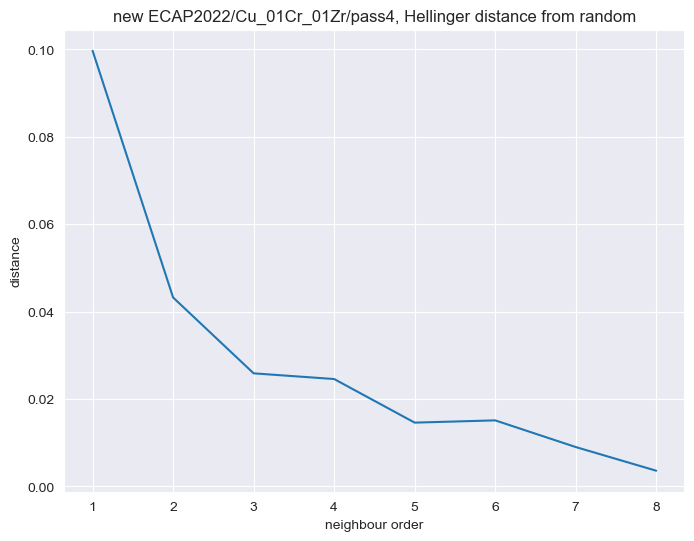

In [70]:
plt.plot(x, distance)
plt.title(title + ', Hellinger distance from random')
plt.xlabel('neighbour order')
plt.ylabel('distance')
plt.xticks(x)
# plt.legend()
plt.show()